# Spring-Mass-Damper systems
##### Spring-mass-damper systems can be used to model and anylize electrical, mechanical, and fluid systems

In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display
InteractiveShell.ast_node_interactivity = "all"
from sympy import *
from sympy.plotting import *
from sympy.matrices import *
init_printing()

In [2]:
natural_frequency, damping_ratio = symbols("\omega_n \zeta", real=True)
mass = symbols("m", real=True)
spring_stiffness, damper_stiffness = symbols("k c", positive=True)

In [3]:
init_position, init_velocity = symbols('x0, v0', real=True)
t = symbols("t", real=True)
F = Function('F_external')
x = Function('x')

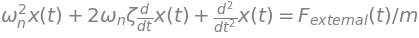

In [4]:
Eq1 = Eq(diff(x(t), t, 2) + 2*damping_ratio*natural_frequency*diff(x(t), t) + natural_frequency**2*x(t),  F(t)/mass)
display(Eq1)

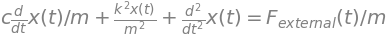

In [5]:
display(Eq(natural_frequency,spring_stiffness/mass))
display(Eq(damping_ratio,damper_stiffness/(2*mass*natural_frequency)))
Eq1 = Eq1.subs(damping_ratio,damper_stiffness/(2*mass*natural_frequency))
Eq1 = Eq1.subs(natural_frequency,spring_stiffness/mass)
display(Eq1)

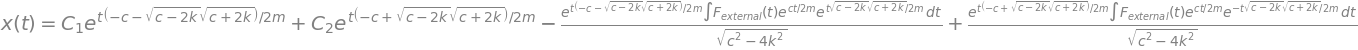

In [6]:
y_sl0 = dsolve(Eq1, x(t)).rhs  # take only right hand side
display(Eq(x(t), y_sl0))

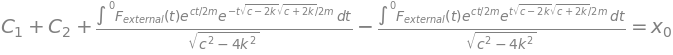

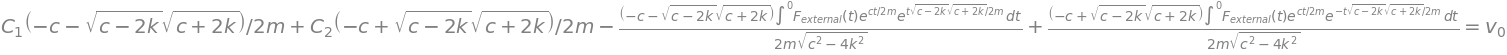

In [7]:
# Initial conditions:
cnd0 = Eq(y_sl0.subs(t, 0), init_position)  # y(0) = a0
cnd1 = Eq(y_sl0.diff(t).subs(t, 0), init_velocity)  # y'(0) = b0
cnd0
cnd1

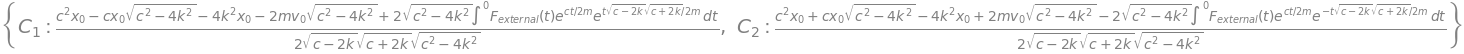

In [8]:
#  Solve for C1, C2:
C1, C2 = symbols("C1, C2")  # generic constants
C1C2_sl = solve([cnd0, cnd1], (C1, C2))
C1C2_sl

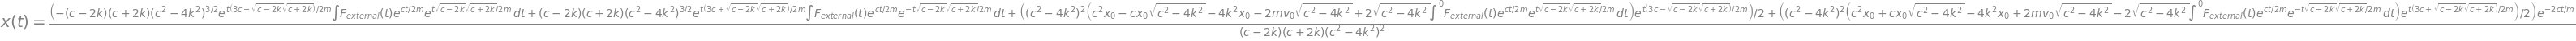

In [9]:
# Substitute back into solution:
y_sl1 = simplify(y_sl0.subs(C1C2_sl))
display(Eq(x(t), y_sl1))

In [10]:
ex_1 = simplify(y_sl1.subs([(F(t),0),(mass,5),(damper_stiffness,0),(spring_stiffness,4),(init_position,2),(init_velocity,0)]))
display(Eq(x(t), ex_1))

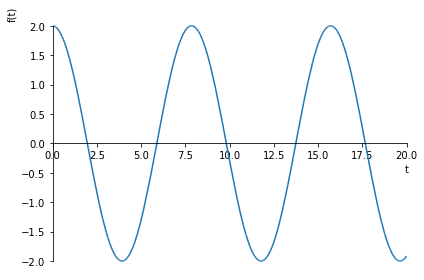

In [13]:
p = plot(ex_1, (t, 0, 20))

In [15]:
ex_2 = simplify(y_sl1.subs([(F(t),0),(mass,5),(damper_stiffness,2),(spring_stiffness,4),(init_position,2),(init_velocity,0)]))
display(Eq(x(t), ex_2))

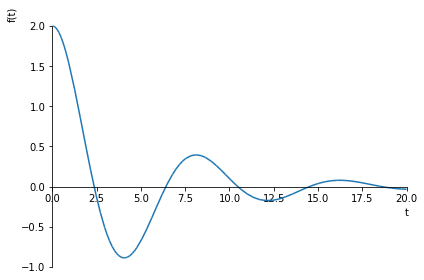

In [16]:
p = plot(ex_2, (t, 0, 20))

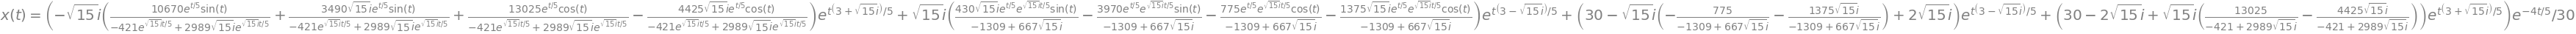

In [17]:
ex_3 = simplify(y_sl1.subs([(F(t),sin(t)),(mass,5),(damper_stiffness,2),(spring_stiffness,4),(init_position,2),(init_velocity,0)]))
display(Eq(x(t), ex_3))

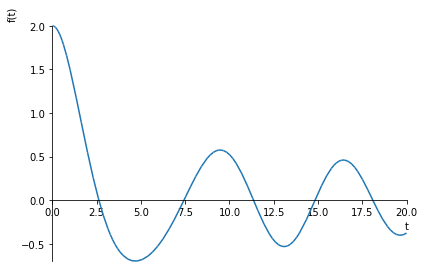

In [18]:
p = plot(ex_3, (t, 0, 20))